In [ ]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def data_preparation(data):

  #print missing value
  print(data.isna().sum())

  dummy = pd.get_dummies(data['gender'])
  dummy_1 = pd.get_dummies(data['category'])
  dummy_2 = pd.get_dummies(data['shopping_mall'])
  data = pd.concat([data, dummy], axis = 'columns')
  data = pd.concat([data, dummy_1], axis = 'columns')
  data = pd.concat([data, dummy_2], axis = 'columns')
  data['payment_method'] = data['payment_method'].replace({'Credit Card' : 1, 'Debit Card' : 2, 'Cash' : 3})
  data.drop('gender', axis=1, inplace=True)
  data.drop('category', axis=1, inplace=True)
  data.drop('shopping_mall', axis=1, inplace=True)
  data.drop('invoice_no', axis=1, inplace=True)
  data.drop('customer_id', axis=1, inplace=True)
  data.drop('invoice_date', axis=1, inplace=True)
  print(data)

  return data

data = pd.read_csv('customer_shopping_data.csv')
new_data = data_preparation(data)


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64
       age  quantity    price  payment_method  Female  Male  Books  Clothing  \
0       28         5  1500.40               1       1     0      0         1   
1       21         3  1800.51               2       0     1      0         0   
2       20         1   300.08               3       0     1      0         1   
3       66         5  3000.85               1       1     0      0         0   
4       53         4    60.60               3       1     0      1         0   
...    ...       ...      ...             ...     ...   ...    ...       ...   
99452   45         5    58.65               1       1     0      0         0   
99453   27         2    10.46               3       0     1      0         0   
99454   63         2    10.46               2       0     1      0 

# **Predict payment method**

In [ ]:
X = new_data.drop(["payment_method","price"] , axis=1).values
Y = new_data.payment_method

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state= 350)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

acc = []

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

range_k = range(5,10)
knn_params = {'n_neighbors': range_k ,'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}
grid_model = GridSearchCV(knn_model, knn_params, cv=5, scoring= 'accuracy')
grid_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred_train = grid_model.predict(X_train)
y_pred_test = grid_model.predict(X_test)
print("Train data accuracy:",accuracy_score(y_train, y_pred_train))
print("Test data accuracy:",accuracy_score(y_test, y_pred_test))

from sklearn import metrics
print(metrics.classification_report(y_pred_test, y_test))

Train data accuracy: 0.5288786107240839
Test data accuracy: 0.39040820430323747
              precision    recall  f1-score   support

           1       0.41      0.35      0.38     12128
           2       0.08      0.21      0.12      2283
           3       0.52      0.45      0.48     15427

    accuracy                           0.39     29838
   macro avg       0.33      0.34      0.32     29838
weighted avg       0.44      0.39      0.41     29838



Train data accuracy: 0.4464585817090162
Test data accuracy: 0.4479187613110798
              precision    recall  f1-score   support

           1       1.00      0.00      0.00     10494
           2       1.00      0.00      0.00      5979
           3       0.45      1.00      0.62     13365

    accuracy                           0.45     29838
   macro avg       0.82      0.33      0.21     29838
weighted avg       0.75      0.45      0.28     29838



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


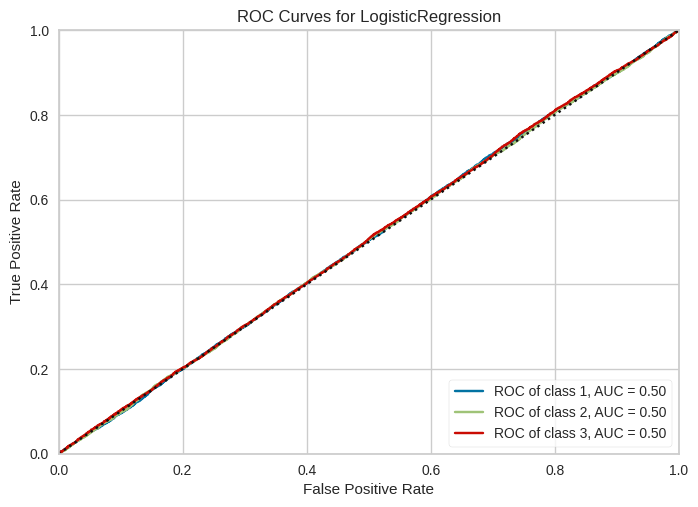

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [13]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)
logis_accu_test = accuracy_score(y_test, y_pred_test)
logis_accu_train = accuracy_score(y_train, y_pred_train)

print(f"Train data accuracy: {logis_accu_train}")
print(f"Test data accuracy: {logis_accu_test}")

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_test, zero_division=1))

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
weighted_avg_logis = precision_recall_fscore_support(y_pred_test, y_test, zero_division=1)

"""print('Weighted Avg. Precision:', weighted_avg_logis[0])
print('Weighted Avg. Recall:', weighted_avg_logis[1])
print('Weighted Avg. F1-score:', weighted_avg_logis[2])
"""
from yellowbrick.classifier import ROCAUC
model = LogisticRegression()
visualizer = ROCAUC(model, micro=False, macro=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Tuned Hyperparameters of Dicision tree model : {'criterion': 'entropy', 'max_depth': 1}
Dicision tree model Accuracy : 0.4464585816648274
Train model Decision tree data accuracy: 0.6668581852655165
Test model Decision tree data accuracy: 0.3655741001407601
              precision    recall  f1-score   support

           1       0.43      0.35      0.39     12988
           2       0.15      0.20      0.17      4633
           3       0.41      0.45      0.43     12217

    accuracy                           0.37     29838
   macro avg       0.33      0.33      0.33     29838
weighted avg       0.38      0.37      0.37     29838

Weighted Avg. Precision tree model : 0.3790920541697503
Weighted Avg. Recall tree model : 0.3655741001407601
Weighted Avg. F1-score tree model : 0.3696229759019115


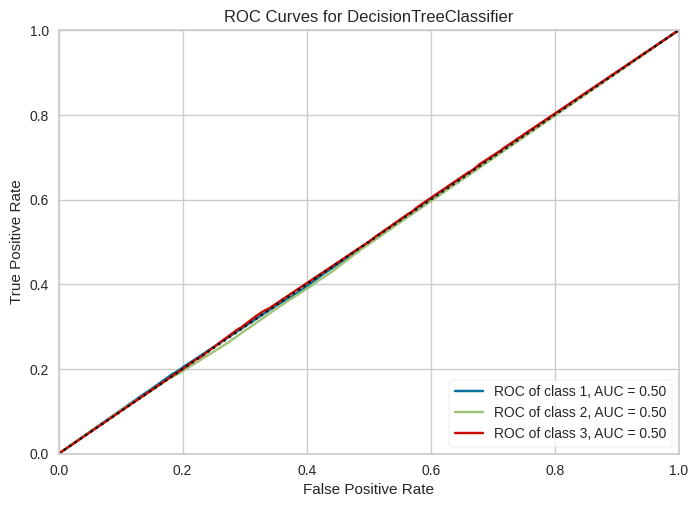

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth' : range (1,101),
    'criterion'  : ['entropy', 'gini'],
}
clf = GridSearchCV(tree_model, parameters, scoring = 'accuracy')
clf.fit(X_train, y_train)

print("Tuned Hyperparameters of Dicision tree model :", clf.best_params_)
print("Dicision tree model Accuracy :",clf.best_score_)

#tree model ค่า accuracy
from sklearn.metrics import accuracy_score
y_pred_train_3 = tree_model.predict(X_train)
y_pred_test_3 = tree_model.predict(X_test)
print("Train model Decision tree data accuracy:",accuracy_score(y_train, y_pred_train_3))
print("Test model Decision tree data accuracy:",accuracy_score(y_test, y_pred_test_3))

#classification report
from sklearn import metrics
print(metrics.classification_report(y_pred_test_3, y_test))

from sklearn.metrics import precision_recall_fscore_support
weighted_avg_tree = precision_recall_fscore_support(y_pred_test_3, y_test, average = 'weighted')
print('Weighted Avg. Precision tree model :', weighted_avg_tree[0])
print('Weighted Avg. Recall tree model :', weighted_avg_tree[1])
print('Weighted Avg. F1-score tree model :', weighted_avg_tree[2])

#plot graph ROC curve
from yellowbrick.classifier import ROCAUC
visualizer_tree = ROCAUC(tree_model, micro = False, macro = False)
visualizer_tree.fit(X_train, y_train)
visualizer_tree.score(X_test, y_test)
visualizer_tree.show()

0.4412875795400681
Train model naive data accuracy: 0.4412875795400681
Test model naive data accuracy: 0.44118238487834305
              precision    recall  f1-score   support

           1       0.06      0.35      0.11      1896
           2       0.00      0.18      0.00        68
           3       0.93      0.45      0.61     27874

    accuracy                           0.44     29838
   macro avg       0.33      0.32      0.24     29838
weighted avg       0.88      0.44      0.57     29838

Weighted Avg. Precision naive model : 0.8770308328537983
Weighted Avg. Recall naive model : 0.44118238487834305
Weighted Avg. F1-score naive model : 0.5726656713628135


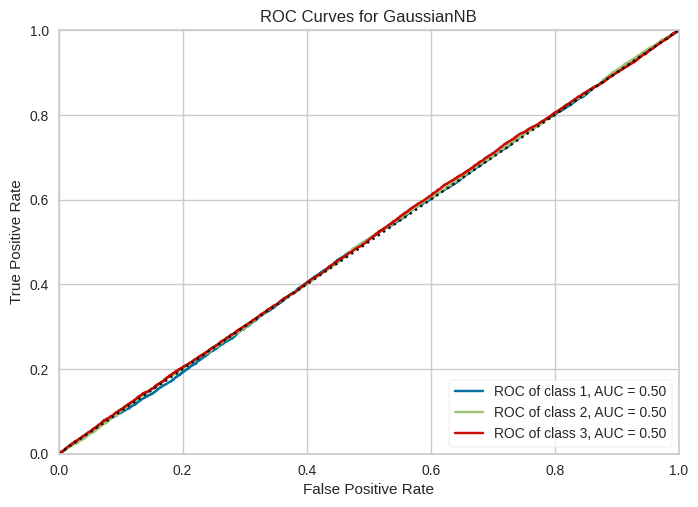

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [14]:
from sklearn.naive_bayes import GaussianNB
Gnb_model = GaussianNB()
Gnb_model.fit(X_train,y_train)
print(Gnb_model.score(X_train,y_train))

#naive bayes model ค่า accuracy
from sklearn.metrics import accuracy_score
y_pred_train_3 = Gnb_model.predict(X_train)
y_pred_test_3 = Gnb_model.predict(X_test)
print("Train model naive data accuracy:",accuracy_score(y_train, y_pred_train_3))
print("Test model naive data accuracy:",accuracy_score(y_test, y_pred_test_3))

#classification report
from sklearn import metrics
print(metrics.classification_report(y_pred_test_3, y_test))

from sklearn.metrics import precision_recall_fscore_support
weighted_avg_tree = precision_recall_fscore_support(y_pred_test_3, y_test, average = 'weighted')
print('Weighted Avg. Precision naive model :', weighted_avg_tree[0])
print('Weighted Avg. Recall naive model :', weighted_avg_tree[1])
print('Weighted Avg. F1-score naive model :', weighted_avg_tree[2])

#plot graph ROC curve
from yellowbrick.classifier import ROCAUC
visualizer_tree = ROCAUC(Gnb_model, micro = False, macro = False)
visualizer_tree.fit(X_train, y_train)
visualizer_tree.score(X_test, y_test)
visualizer_tree.show()

# **Predeict Price**

In [15]:
data = pd.read_csv('customer_shopping_data.csv')
new_data = data_preparation(data)

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64
       age  quantity    price  payment_method  Female  Male  Books  Clothing  \
0       28         5  1500.40               1       1     0      0         1   
1       21         3  1800.51               2       0     1      0         0   
2       20         1   300.08               3       0     1      0         1   
3       66         5  3000.85               1       1     0      0         0   
4       53         4    60.60               3       1     0      1         0   
...    ...       ...      ...             ...     ...   ...    ...       ...   
99452   45         5    58.65               1       1     0      0         0   
99453   27         2    10.46               3       0     1      0         0   
99454   63         2    10.46               2       0     1      0 

In [16]:
X = new_data.drop(["payment_method","price"] , axis=1).values
Y = new_data.price

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state= 350)

In [19]:
from sklearn.linear_model import LinearRegression
LinReg_model = LinearRegression()
LinReg_model.fit(X_train, y_train)
print(f"\nScore Model 2 {LinReg_model.score(X,Y)}")
print(LinReg_model.intercept_)
print(f"coefficient 2: {LinReg_model.coef_}")

from sklearn.metrics import mean_squared_error
y_pre = LinReg_model.predict(X_test)
print("R-squared 2:", LinReg_model.score(X_test,y_test))
print("Mean squared error 2: %.7f" % mean_squared_error( y_test, y_pre))


Score Model 2 0.8408298003739474
689.2884957526114
coefficient 2: [ 1.68404295e+00  3.22886561e+02 -3.99168479e+09 -3.99168479e+09
 -1.30680040e+10 -2.85150655e+10 -2.14982867e+10 -2.13089313e+10
 -1.80447925e+10 -1.30903476e+10 -1.30866263e+10 -1.80870245e+10
 -3.50508799e+10 -3.44457930e+10 -3.49041618e+10 -4.78076196e+10
 -6.41359205e+10 -6.42812660e+10 -5.74727172e+10 -4.86241032e+10
 -3.47936221e+10 -3.53288896e+10]
R-squared 2: 0.8372350025880544
Mean squared error 2: 144277.2243901
